### Problem Statement
Surprise Housing, a US-based housing company, is planning to enter the Australian real estate market. The company employs a data-driven approach, utilizing data analytics to purchase houses below their market values and subsequently selling them at a profit. To facilitate this strategy, Surprise Housing has gathered a dataset from the sale of houses in Australia.

The primary goal is to develop a regression model using regularization techniques to predict the actual value of prospective properties. This predictive model will aid in the decision-making process of whether to invest in these properties or not.

In [1]:
# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

### Importing and Understanding Data

In [3]:
# Reading and inspecting the dataframe

h_data = pd.read_csv("/content/train.csv")
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
h_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
#inspecting the dataframe
# checking the number of rows and columns
h_data.shape

(1460, 81)

In [6]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Checking the Null values

h_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Checking if there are columns with one unique value since it won't affect our analysis
h_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [9]:
#Checking the value count

h_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
h_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
h_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [12]:
h_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### Data Preparation (Encoding Categorical Variables, Handling Null Values)


### Imputing Null Values

In [13]:
## Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(h_data.isnull().sum()/len(h_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [14]:
## Treating the NaN Values
h_data['PoolQC'] = h_data['PoolQC'].fillna('No_Pool')
h_data['MiscFeature'] = h_data['MiscFeature'].fillna('None')
h_data['Alley'] = h_data['Alley'].fillna('No_Alley_Access')
h_data['Fence'] = h_data['Fence'].fillna('No_Fence')
h_data['FireplaceQu'] = h_data['FireplaceQu'].fillna('No_Fireplace')
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].fillna(0)
h_data['MasVnrType'] = h_data['MasVnrType'].fillna('None')
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['Electrical'] = h_data['Electrical'].fillna("Other")

In [15]:
## Dropping the LotFontgage columns as it have more Null values
h_data.drop("LotFrontage",axis = 1, inplace=True)

In [16]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    h_data[col] = h_data[col].fillna('No_Basement')

In [17]:
#Imputing the NaN values with 'no garage'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    h_data[col] = h_data[col].fillna('No_Garage')


In [18]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].astype(int)

## Performing EDA


### Univariate and Bivariate Analysis

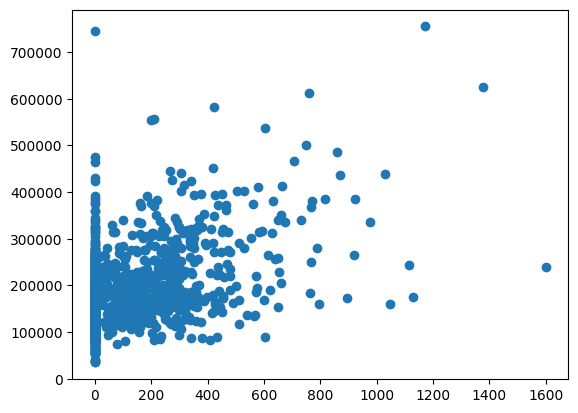

In [20]:
plt.scatter(h_data.MasVnrArea,h_data.SalePrice)

Text(0.5, 1.0, 'Veneer Area')

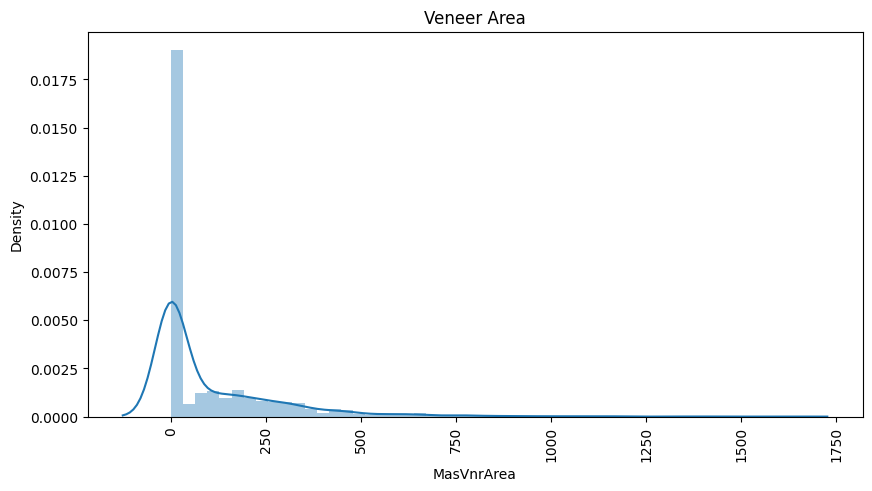

In [21]:
# plotting a distplot
plt.figure(figsize = (10,5))
sns.distplot(h_data['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

<Axes: xlabel='SalePrice', ylabel='Density'>

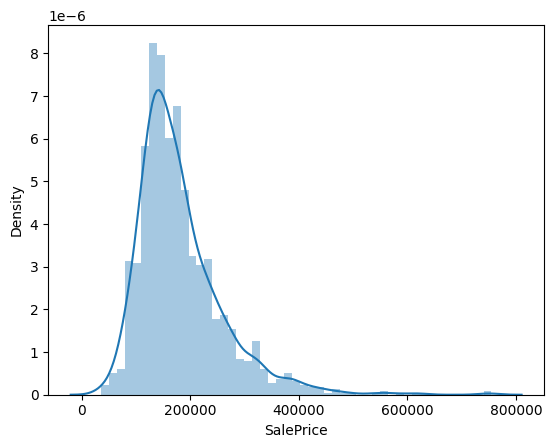

In [22]:
sns.distplot(h_data['SalePrice'])

In [23]:
print("Skewness: %f" % h_data['SalePrice'].skew())
print("Kurtosis: %f" % h_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

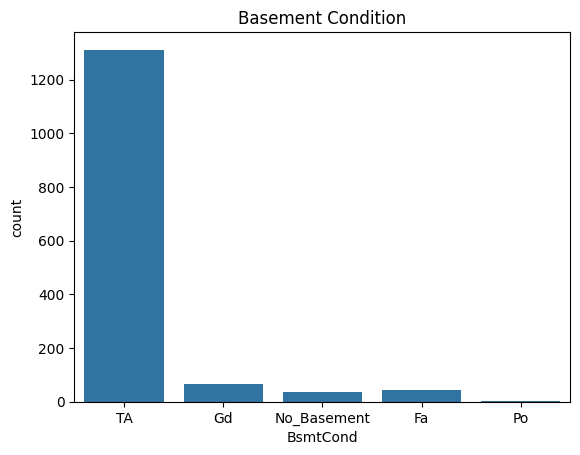

In [24]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= h_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

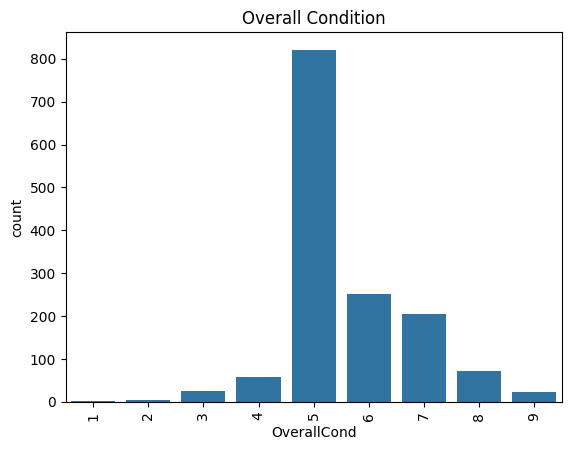

In [25]:
sns.countplot(x='OverallCond', data= h_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

               5 is most overall condition

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

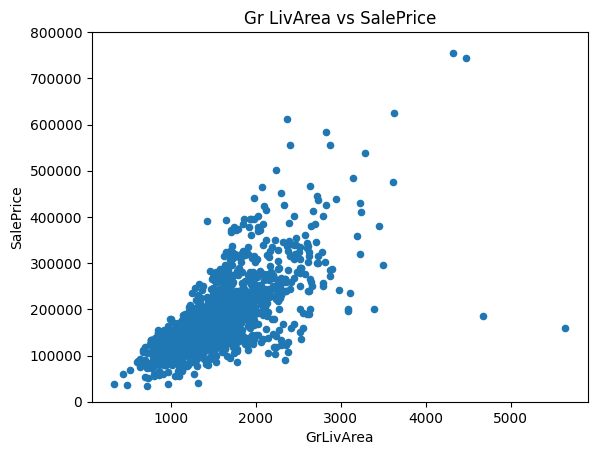

In [26]:
data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

<Axes: xlabel='SalePrice'>

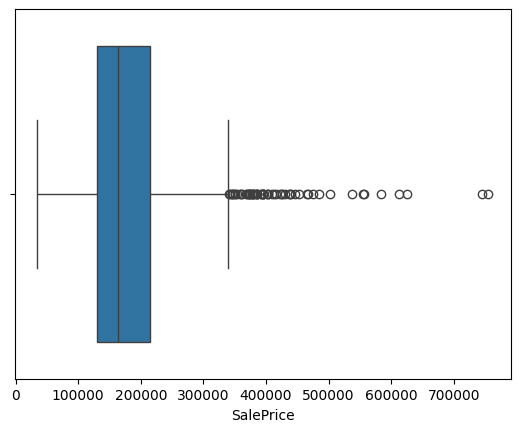

In [27]:
# Checking the outliers

sns.boxplot(x='SalePrice', data=h_data)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

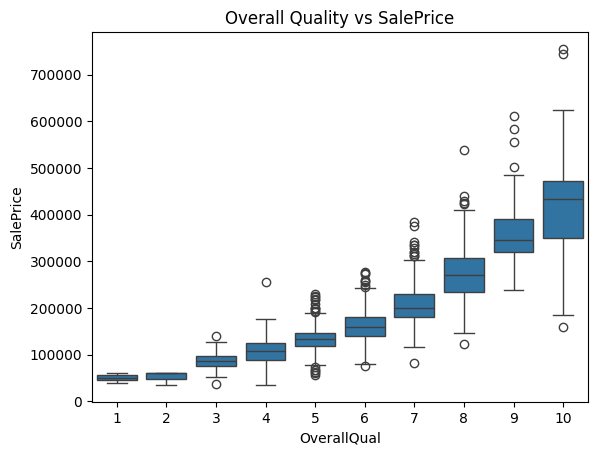

In [28]:
sns.boxplot(x='OverallQual', y='SalePrice', data=h_data)
plt.title("Overall Quality vs SalePrice")

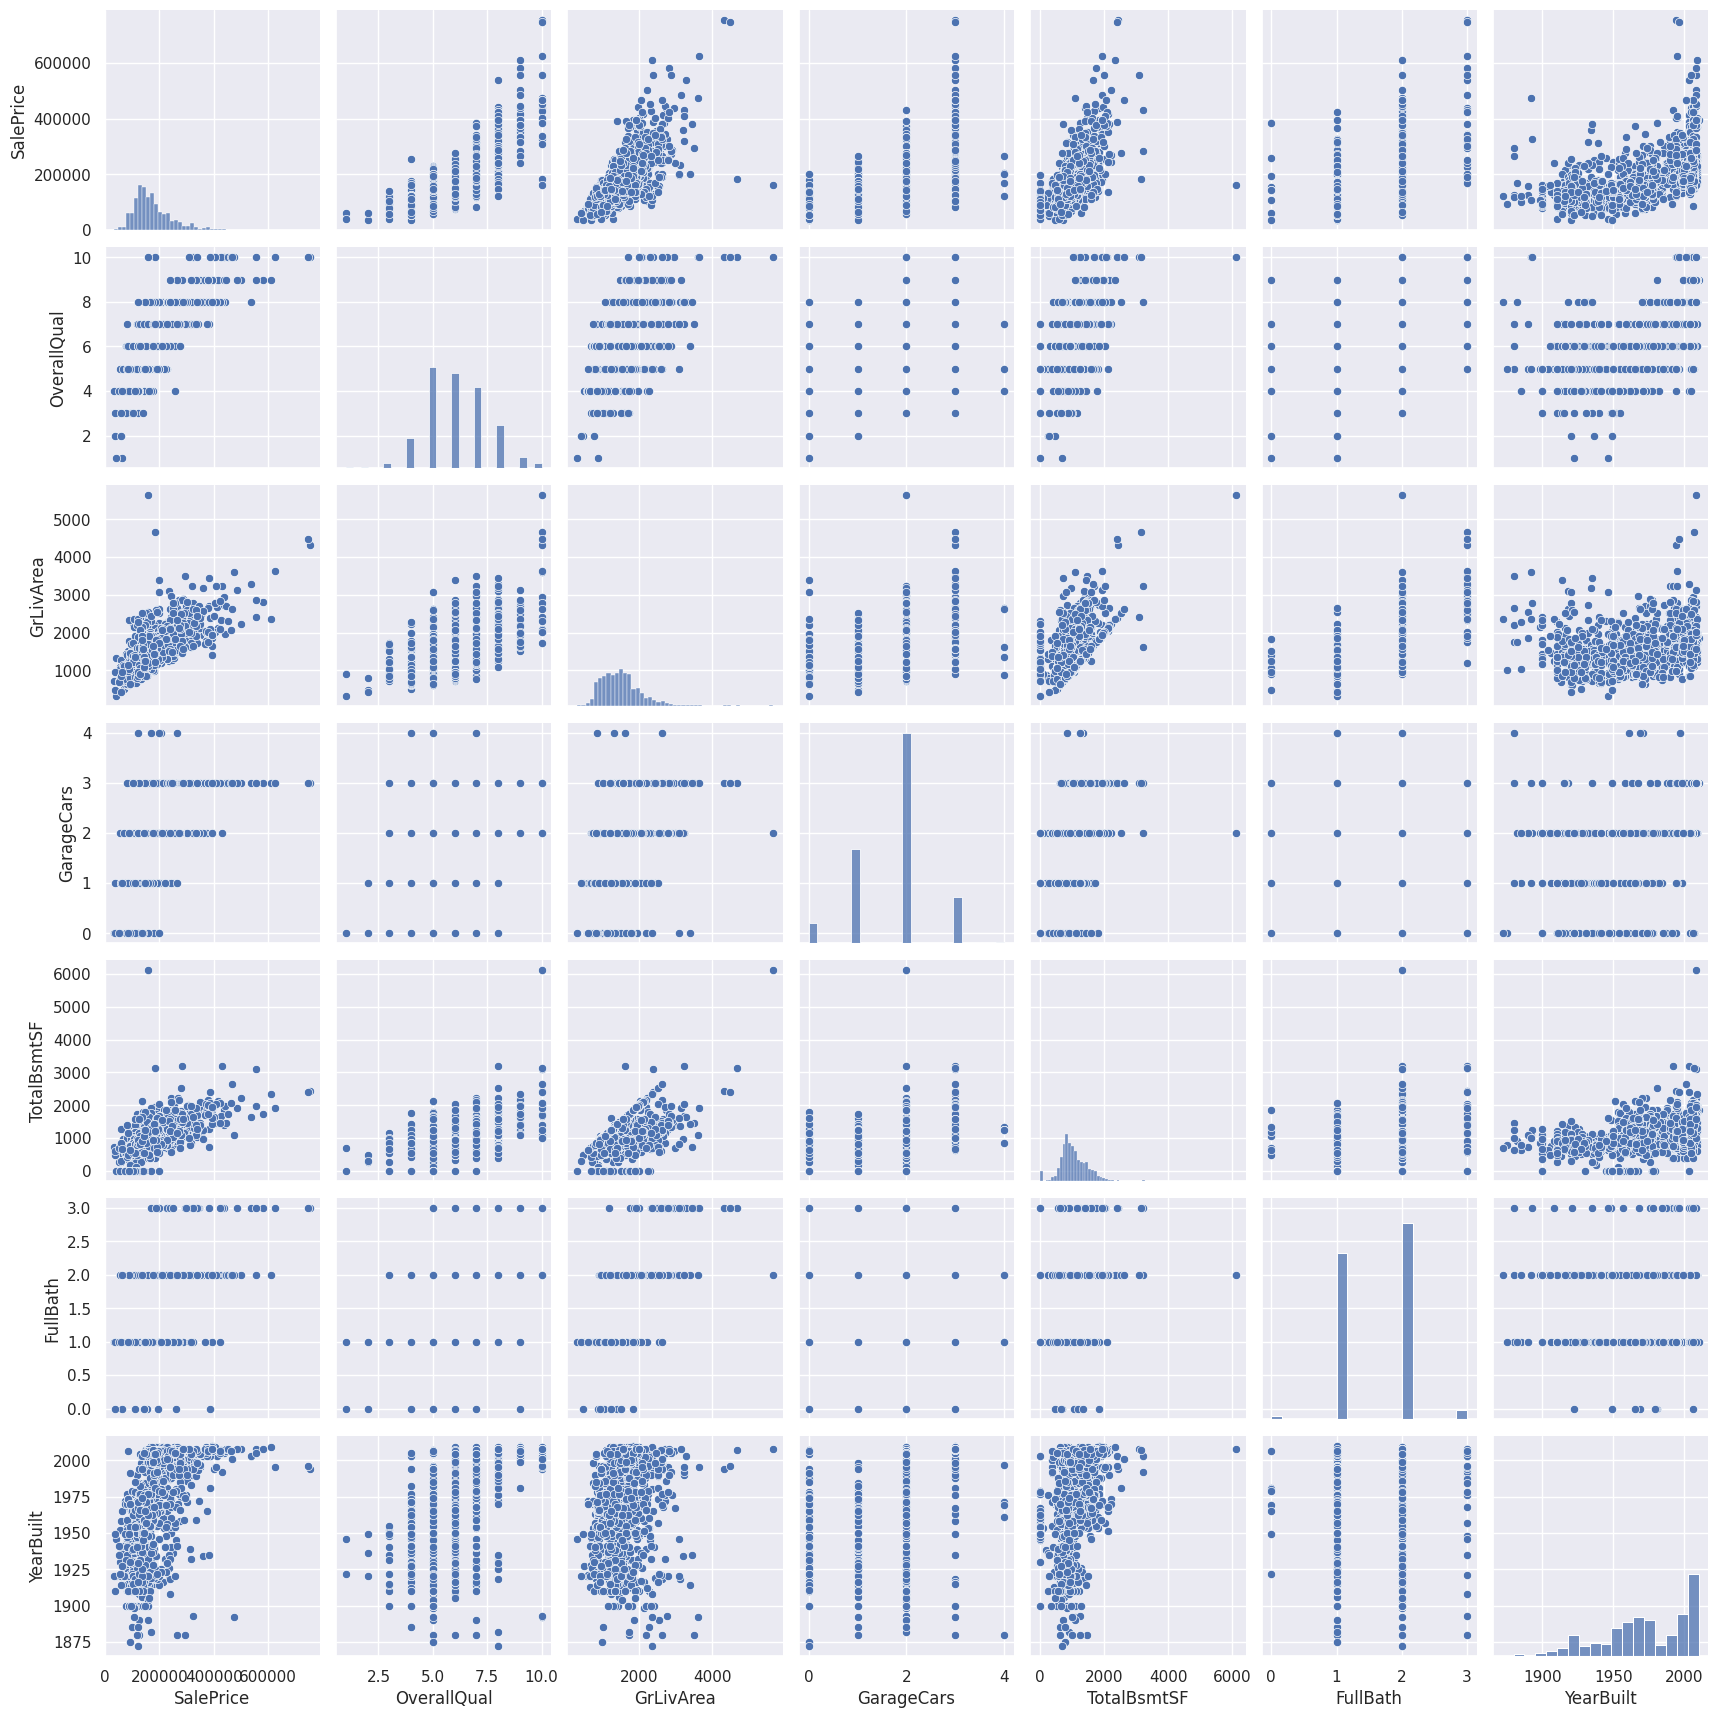

In [29]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

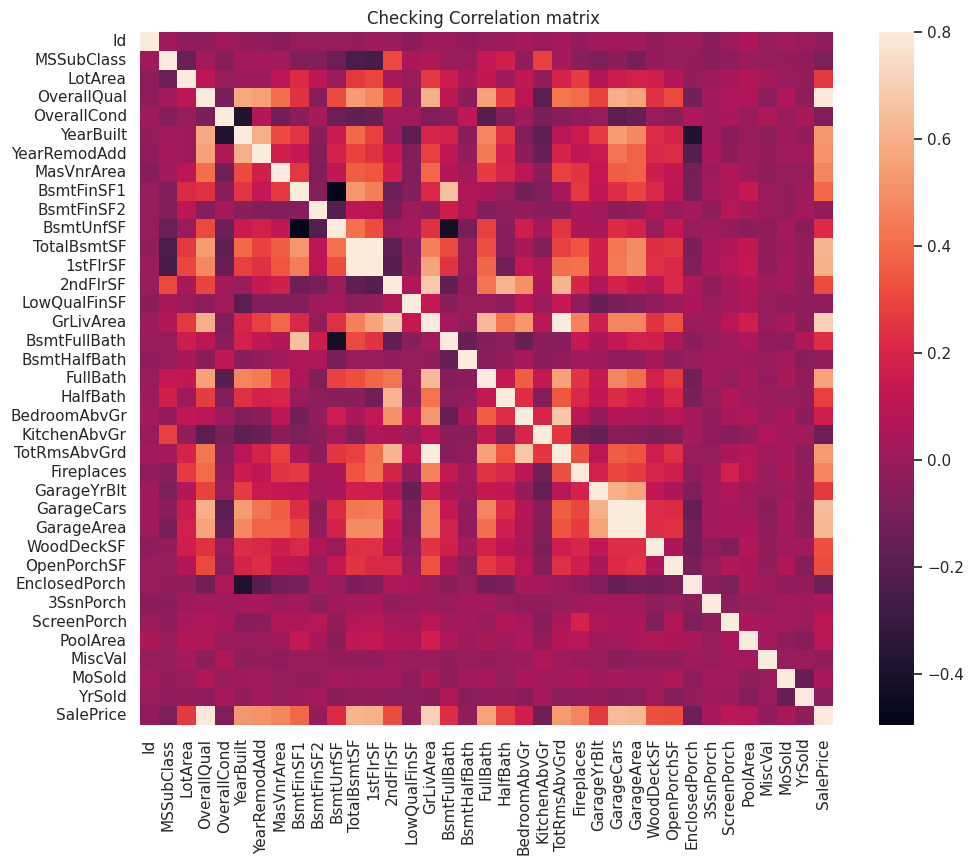

In [30]:
#checjing the correlation matrix
corrmat = h_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

## Data Preperation

<Axes: xlabel='SalePrice', ylabel='Density'>

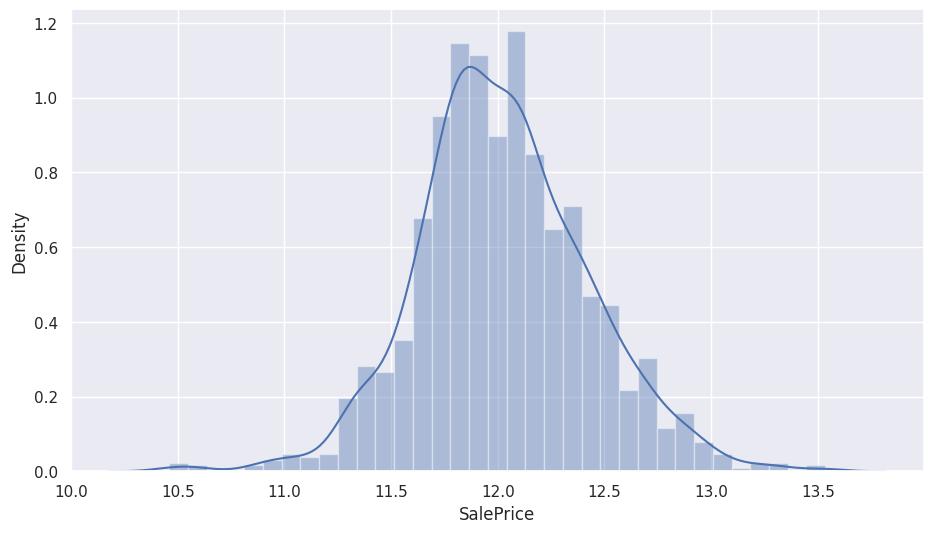

In [31]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(h_data["SalePrice"]))

#### ```Deriving Variables```

In [32]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [33]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
h_data['Street'] = h_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

h_data['CentralAir'] = h_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

h_data['PavedDrive'] = h_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [34]:
cat_values = h_data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [35]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
## Droping the 'Id' column
df = h_data.drop(['Id'],axis=1)

In [37]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [38]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [39]:
df.shape

(1460, 259)

# ```Train Test Split```

In [40]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [41]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [42]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [43]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## ```Model Building```

In [46]:
## Building a Regression model.
reg = LinearRegression()
#reg.fit(X_train,y_train)
rfe = RFE(reg, n_features_to_select=20)  # Specify the number of features to select
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [47]:
# Calculating the RFE
#rfe = RFE(reg, 20)
#rfe = rfe.fit(X_train, y_train)
#rfe = RFE(estimator, n_features_to_select=20)  # Specify the number of features to select
#rfe.fit(X_train, y_train)

In [48]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Condition2_PosN',
       'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior2nd_AsphShn',
       'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'Electrical_FuseP',
       'Functional_Sev', 'GarageQual_Po', 'PoolQC_Gd'],
      dtype='object')

In [49]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.75e-279
Time:                        07:05:18   Log-Likelihood:                 192.60
No. Observations:                1021   AIC:                            -343.2
Df Residuals:                    1000   BIC:                            -239.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0452      0.117     94.243      0.000      10.815      11.275
OverallQual             0.3039      0.007     44.976      0.000       0.291       0.317
MSZoning_FV             0.4551      0.084      5.413      0.000       0.290       0.620
MSZoning_RH             0.4147      0.095      4.343      0.000       0.227       0.602
MSZoning_RL             0.5246      0.078      6.728      0.000       0.372       0.678
MSZoning_RM             0.3101      0.079      3.925      0.000       0.155       0.465
Neighborhood_BrDale    -0.2650      0.061     -4.348      0.000      -0.385      -0.145
Condition2_PosN        -0.7910      0.203     -3.888      0.000      -1.190      -0.392
RoofStyle_Shed          0.2628      0.143      1.833      0.067      -0.018       0.544
RoofMatl_Membran        0.1286      0.203      0.635      0.526      -0.269       0.526
RoofMatl_Tar&Grv        0.2612      0.096      2.723      0.007       0.073       0.449
RoofMatl_WdShngl        0.2599      0.102      2.551      0.011       0.060       0.460
Exterior1st_BrkComm    -0.6444      0.153     -4.202      0.000      -0.945      -0.343
Exterior2nd_AsphShn    -0.3186      0.203     -1.572      0.116      -0.716       0.079
Heating_GasA            0.4988      0.088      5.699      0.000       0.327       0.671
Heating_GasW            0.6143      0.105      5.875      0.000       0.409       0.820
Heating_Wall            0.4229      0.134      3.154      0.002       0.160       0.686
Electrical_FuseP       -0.3177      0.130     -2.447      0.015      -0.572      -0.063
Functional_Sev         -0.5424      0.224     -2.422      0.016      -0.982      -0.103
GarageQual_Po           0.2278      0.165      1.378      0.168      -0.097       0.552
PoolQC_Gd              -0.9348      0.203     -4.595      0.000      -1.334      -0.536
==============================================================================
Omnibus:                        8.150   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               10.586
Skew:                           0.079   Prob(JB):                      0.00503
Kurtosis:                       3.473   Cond. No.                         59.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ridge Regression

In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08887409934430093


In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029782,0.009426,0.010416,0.001595,0.0001,{'alpha': 0.0001},-0.091274,-0.095969,-0.095115,-0.087270,...,-0.090442,0.004999,14,-0.054605,-0.055116,-0.055868,-0.056766,-0.055703,-0.055612,0.000730
1,0.034721,0.004336,0.014663,0.004287,0.001,{'alpha': 0.001},-0.090981,-0.095919,-0.095062,-0.087130,...,-0.090319,0.005012,13,-0.054637,-0.055126,-0.055883,-0.056849,-0.055737,-0.055646,0.000748
2,0.058899,0.008179,0.019492,0.002509,0.01,{'alpha': 0.01},-0.090322,-0.095571,-0.094671,-0.086389,...,-0.089877,0.004964,8,-0.054828,-0.055242,-0.056021,-0.057084,-0.055877,-0.055811,0.000769
3,0.054837,0.007211,0.023858,0.003865,0.05,{'alpha': 0.05},-0.089956,-0.094644,-0.094108,-0.084318,...,-0.089202,0.004833,4,-0.055810,-0.055719,-0.056611,-0.057731,-0.056753,-0.056525,0.000731
4,0.059308,0.009622,0.025200,0.004543,0.1,{'alpha': 0.1},-0.089820,-0.094123,-0.094180,-0.082811,...,-0.088874,0.004958,1,-0.057025,-0.056196,-0.057303,-0.058636,-0.057873,-0.057407,0.000819
5,0.054785,0.008310,0.019006,0.001181,0.2,{'alpha': 0.2},-0.090348,-0.093800,-0.094783,-0.081237,...,-0.088880,0.005315,2,-0.059153,-0.056936,-0.058602,-0.060613,-0.059764,-0.059014,0.001235
6,0.064981,0.012860,0.021721,0.001669,0.3,{'alpha': 0.3},-0.090958,-0.093756,-0.095291,-0.080168,...,-0.089000,0.005682,3,-0.060833,-0.057554,-0.059782,-0.062292,-0.061428,-0.060378,0.001631
7,0.039266,0.011003,0.014032,0.003433,0.4,{'alpha': 0.4},-0.091488,-0.093843,-0.095747,-0.079508,...,-0.089264,0.005926,5,-0.062220,-0.058069,-0.060731,-0.063693,-0.062831,-0.061509,0.001973
8,0.022730,0.005885,0.008251,0.002581,0.5,{'alpha': 0.5},-0.091849,-0.093881,-0.096109,-0.079474,...,-0.089531,0.005981,6,-0.063442,-0.058536,-0.061537,-0.064837,-0.063983,-0.062467,0.002244
9,0.032923,0.006411,0.013074,0.001422,0.6,{'alpha': 0.6},-0.092042,-0.093937,-0.096402,-0.079518,...,-0.089738,0.006008,7,-0.064474,-0.058964,-0.062212,-0.065800,-0.064951,-0.063280,0.002463


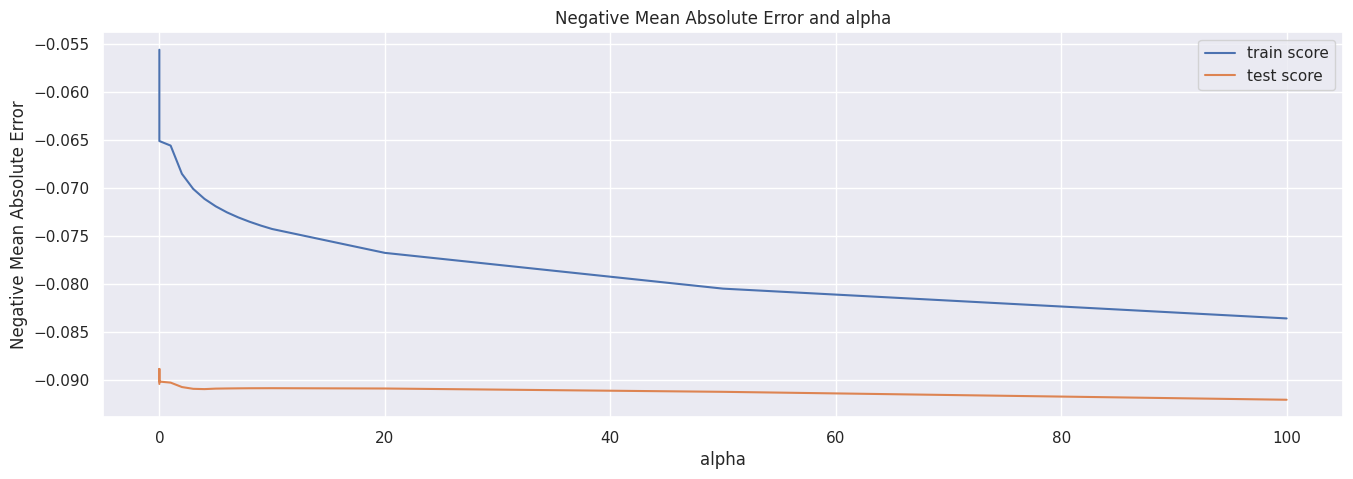

In [54]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [55]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13588570e-02,  1.89916661e-02,  7.32789555e-03,  7.96272275e-02,
        4.07794642e-02,  3.72503132e-02,  2.05613215e-02, -2.78746650e-03,
       -1.30338934e-03,  7.00573270e-03,  4.35792500e-03,  5.54556617e-03,
        1.48198007e-02,  3.71802844e-02,  4.20641346e-02,  8.38742474e-04,
        6.23081651e-02,  2.96129113e-02,  2.70982155e-03,  1.87339500e-02,
        1.07449570e-02,  1.20912671e-02, -1.36072850e-02,  1.55763992e-02,
        2.26754481e-03, -5.94799196e-05,  4.02868362e-02,  4.26535353e-03,
        1.44146209e-03,  1.36106893e-02, -2.04566096e-03,  8.78577136e-03,
        7.21093263e-03,  1.06190103e-02, -1.48410955e-02, -1.45446773e-06,
       -1.10808590e-03, -6.42496774e-03,  4.82665080e-02,  3.90987203e-02,
        6.20215605e-02,  1.56874391e-02,  2.13169821e-03,  2.59754430e-02,
        2.43132363e-02, -5.00429742e-02,  4.82147056e-03,  3.82128670e-02,
        3.57786613e-02,  4.68948900e-02, -1.30779655e-02,  3.69458991e-02,
       -3.54872267e-02, -

In [56]:
#lets predict the R-squared value
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9220052627340902


In [57]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8855289803702381


In [58]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.018835074908961157

### Lasso Regression

In [59]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [61]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08331689574723347


In [62]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [63]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9174603870114236


In [64]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.855155175069992


In [65]:
mean_squared_error(y_test, y_test_pred)

0.02383278437246275

In [66]:
lasso.coef_

array([-1.59168660e-02,  1.77242515e-02,  7.44417847e-03,  8.92749012e-02,
        4.49157058e-02,  5.23478512e-02,  2.12557290e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73459395e-02,
        1.31313542e-02,  6.83279688e-04,  0.00000000e+00, -2.76090229e-03,
        1.17924486e-01,  3.11590599e-02,  2.04071491e-03,  1.34016928e-02,
        8.46182617e-03,  5.71184430e-03, -1.14936774e-02,  1.31288789e-02,
        6.75035320e-03, -0.00000000e+00,  3.85988417e-02,  5.82205706e-03,
        1.77927095e-03,  1.28633145e-02, -0.00000000e+00,  5.99863586e-03,
        5.33667706e-03,  1.05740180e-02, -1.35240020e-02, -9.49510163e-04,
       -1.35177379e-03, -5.95070195e-03,  0.00000000e+00,  0.00000000e+00,
        4.67117524e-02, -7.00746204e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.40381931e-03, -0.00000000e+00,  2.90059351e-02,
       -0.00000000e+00, -

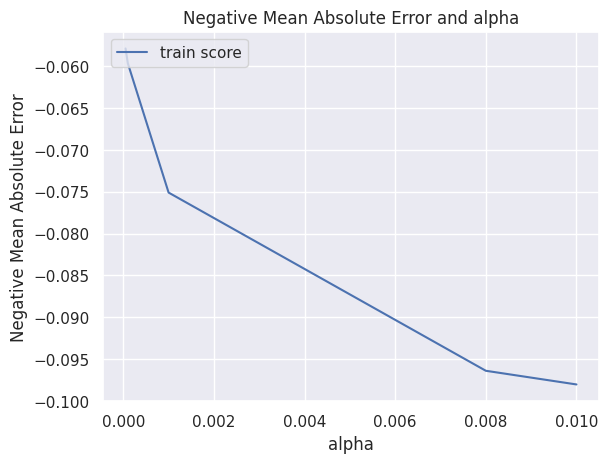

In [67]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
model_cv.best_params_

{'alpha': 0.1}

In [69]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9575101062262641
0.7491749725359178


In [70]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [72]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,10.803599
114,RoofMatl_Membran,0.434660
39,MSZoning_FV,0.401700
41,MSZoning_RL,0.401658
40,MSZoning_RH,0.396997
42,MSZoning_RM,0.354862
116,RoofMatl_Roll,0.307582
115,RoofMatl_Metal,0.303702
119,RoofMatl_WdShngl,0.294295
237,PoolQC_No_Pool,0.248195


In [73]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9174603870114236
0.855155175069992


#### After compairing both the models i.e. Ridge and Lasso Regression we can see that the below Features are best explaining the DataSet

- MSSubClass
- RoofMatl_Membran
- MSZoning_RL
- MSZoning_FV
- MSZoning_RH
- MSZoning_RM
- Condition2_PosA
- RoofMatl_WdShngl